In [1]:
from src.simgraph import calc_simgraph

import matplotlib.pyplot as plt
#plt.rcParams['figure.dpi'] = 200

In [2]:
#For some setups its neccessary to allow tensorflow to allocate gpu memory
import tensorflow as tf
physical_devices = tf.config.experimental.list_physical_devices('GPU')
assert len(physical_devices) > 0, "Not enough GPU hardware devices available"
tf.config.experimental.set_memory_growth(physical_devices[0], True)


In [3]:
f1 = './testimages/splicing-01.TIF' #spliced image
f2 = './testimages/normal-01.TIF' #authentic image

fweights = './models/cam_256/-30' #path to model CNN weights
patch_size = 256 #patch size, must match associated weights file
overlap = 0 #patch sampling overlap, usually this is set to 50% or 75% of the patch size 
#here it's set low to keep the patch numbers low for computation and visualization purposes

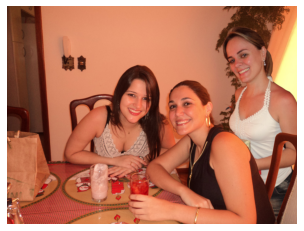

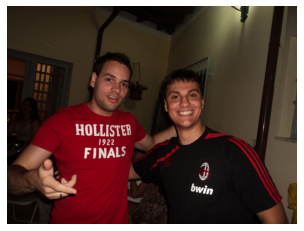

In [4]:
#show both images

I1 = plt.imread(f1)[:,:,:3]
plt.imshow(I1)
plt.axis('off')
plt.show()

I2 = plt.imread(f2)[:,:,:3]
plt.imshow(I2)
plt.axis('off')
plt.show()

In [5]:
#compute similarity graph for image 1 (spliced)
sg1 = calc_simgraph(image = I1,
                    f_weights_restore = fweights, patch_size = patch_size,
                    overlap = overlap)






The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

Instructions for updating:
Use keras.layers.BatchNormalization instead.  In particular, `tf.control_dependencies(tf.GraphKeys.UPDATE_OPS)` should not be used (consult the `tf.keras.layers.batch_normalization` documentation).
Instructions for updating:
Please use `layer.__call__` method instead.



INFO:tensorflow:Restoring parameters from ./models/cam_256/-30


100%|██████████| 48/48 [00:00<00:00, 990.82it/s]


(<Figure size 432x288 with 2 Axes>,
 <AxesSubplot:xlabel='Patch 2 Index', ylabel='Patch 1 Index'>)

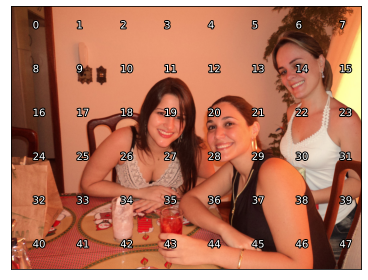

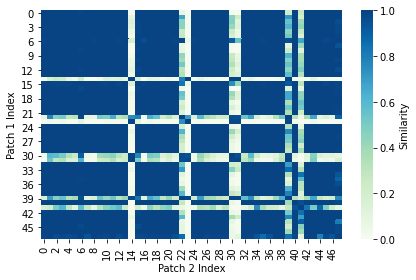

In [6]:
#plot index overlay for sampled patches
sg1.plot_indices(image=I1)

#plot forensic similarity matrix, which will be used later for creating the graph
sg1.plot_matrix()

In [7]:
import igraph as ig
from src.graph_utils import adj_to_graph, sym_mat
import numpy as np


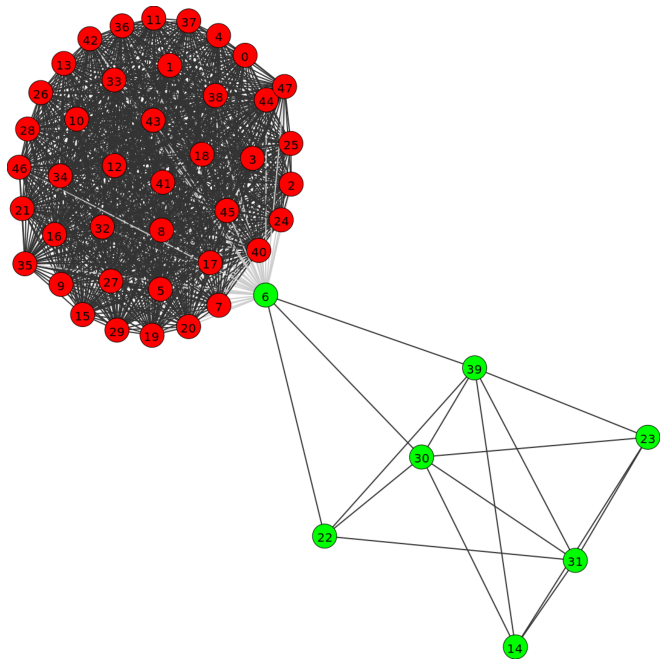

In [8]:
M = sym_mat(sg1.mat) #make the similarity matrix symmetric
np.fill_diagonal(M, 0) #set diagonals to zero (doesn't matter for calculations, just makes the plot look nicer)
g = adj_to_graph(M,threshold=0.9) #convert to igraph representation
c = g.community_fastgreedy(weights=g.es['weight']) #compute community structure

ig.plot(c.as_clustering(n=2), 'temp_graph.png', bbox = (1080,1080), #plot it
        layout = 'kk', vertex_label_size=20, vertex_size=40, edge_width=2)

#you can play around with some other force directed layout methods:
#layout = 'kk' uses kamada-kawaii force directed layout 
#layout = 'fr' Fruchterman-Reingold
#layout = 'grid_fr' Grid Fruchterman-Reingold
#layout = 'drl' Distributed Recursive Layout
f,ax = plt.subplots(1,figsize=(12,12))
ax.imshow(plt.imread('temp_graph.png'))
ax.set_axis_off()
plt.show()

INFO:tensorflow:Restoring parameters from ./models/cam_256/-30


100%|██████████| 48/48 [00:00<00:00, 1199.16it/s]


(<Figure size 432x288 with 2 Axes>,
 <AxesSubplot:xlabel='Patch 2 Index', ylabel='Patch 1 Index'>)

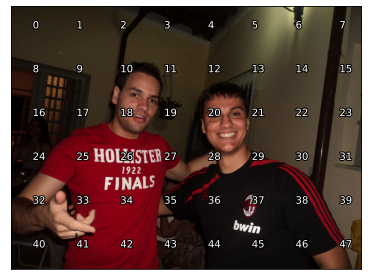

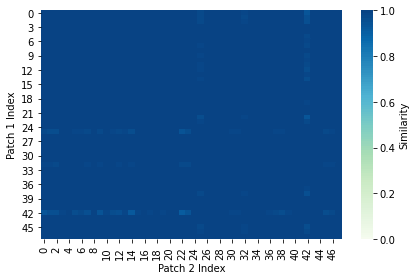

In [9]:
#compute similarity graph for image 2 (authentic)
sg2 = calc_simgraph(image = I2,
                    f_weights_restore = fweights, patch_size = patch_size,
                    overlap = overlap)
#plot index overlay for sampled patches
sg2.plot_indices(image=I2)

#plot forensic similarity matrix, which will be used later for creating the graph
sg2.plot_matrix()

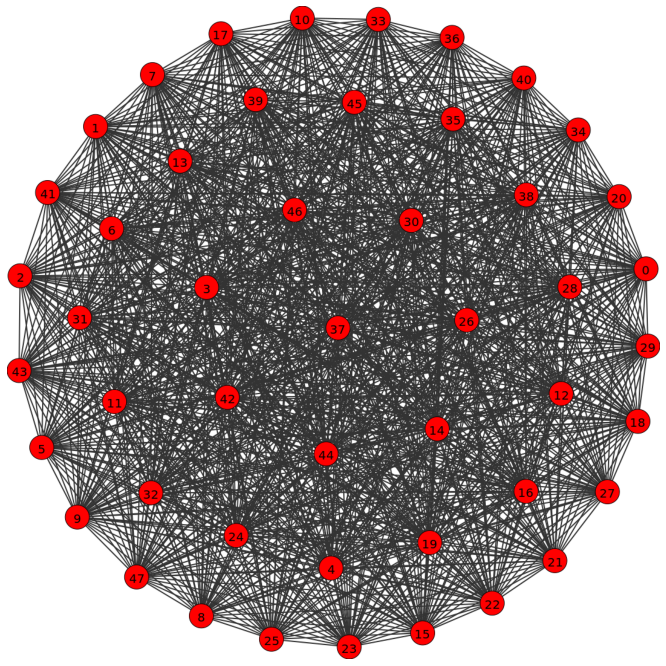

In [10]:
M = sym_mat(sg2.mat) #make the similarity matrix symmetric
np.fill_diagonal(M, 0) #set diagonals to zero (doesn't matter for calculations, just makes the plot look nicer)
g = adj_to_graph(M,threshold=0.9) #convert to igraph representation
c = g.community_fastgreedy(weights=g.es['weight']) #compute community structure

ig.plot(c.as_clustering(), 'temp_graph.png', bbox = (1080,1080), #plot it
        layout = 'kk', vertex_label_size=20, vertex_size=40, edge_width=2)

f,ax = plt.subplots(1,figsize=(12,12))
ax.imshow(plt.imread('temp_graph.png'))
ax.set_axis_off()
plt.show()